<a href="https://colab.research.google.com/github/inderaihsan/Coffee-Linear-Regression/blob/main/Coffee_Data_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [49]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize
from sklearn import utils 
import matplotlib.pyplot as plt 
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Read Data

In [43]:
data=pd.read_csv('/content/Coffee Regression.csv') 
data.head() 
dataregress=data[(['Aroma',	'Flavor',	'Aftertaste',	'Acidity',	'Body',	'Balance',	'Uniformity',	'Clean.Cup',	'Sweetness',	'Cupper.Points',	'Total.Cup.Points',	'Moisture',	'Category.One.Defects',	'Quakers', 'Category.Two.Defects'	,'Cuper.Points'])] 
dataregress.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Cuper.Points
0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0,1.0,8.58
1,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0,2.0,8.58
2,8.42,8.50,8.33,8.50,8.25,8.25,10.0,10.0,10.0,8.50,88.75,0.11,0,0,0.0,8.50
3,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,0.10,0,0,4.0,8.50
4,8.42,8.25,8.08,8.17,7.92,8.00,10.0,10.0,10.0,8.42,87.25,0.10,0,0,0.0,8.42


In [ ]:
data.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Cuper.Points
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,7.556261,7.504478,7.380071,7.520557,7.502209,7.499179,9.857305,9.838511,9.925593,7.465461,82.049838,0.096484,0.450861,0.174265,3.840932,7.465461
std,0.295588,0.318154,0.328833,0.302188,0.270474,0.335167,0.465145,0.764580,0.436123,0.384233,2.599859,0.041901,1.998571,0.819406,5.537080,0.384233
min,5.080000,6.080000,6.170000,5.250000,6.330000,6.080000,6.000000,0.000000,1.330000,5.170000,59.830000,0.000000,0.000000,0.000000,0.000000,5.170000
25%,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.100000,0.000000,0.000000,0.000000,7.250000
50%,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.420000,0.110000,0.000000,0.000000,2.000000,7.500000
75%,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,10.000000,10.000000,7.670000,83.500000,0.120000,0.000000,0.000000,5.000000,7.670000
max,8.750000,8.670000,8.500000,8.580000,8.420000,8.580000,10.000000,10.000000,10.000000,8.580000,89.920000,0.170000,31.000000,11.000000,47.000000,8.580000


#Finding The Linear Feature

We can see that the data below shows that there are several features that could be use as independent variables in linear regression in predicting the cupper.points. the data should be having linearity (as x goes up the y goes up) in this case the independent variable will be Aroma, Flavor, Aftertaste, Acidity, Body, Balance

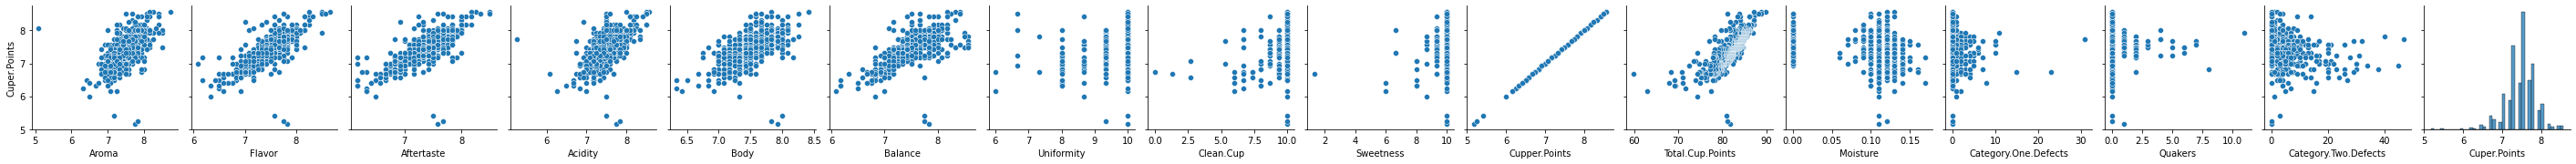

In [ ]:
sns.pairplot(dataregress , x_vars =dataregress[:] , y_vars=['Cuper.Points']) #The data is in Normalization and is not typically different  

Linear Scaling Normalization will be used in this regression. here are the equation
**$x' =\frac{x-min(x)}{max(x)-min(x)}$**

In [53]:
datanormal=dataregress
for x in datanormal.columns :
  datanormal[x]=((datanormal[x]-datanormal[x].min()/data[x].max()-data[x].min()))*10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Value After normalizing the data

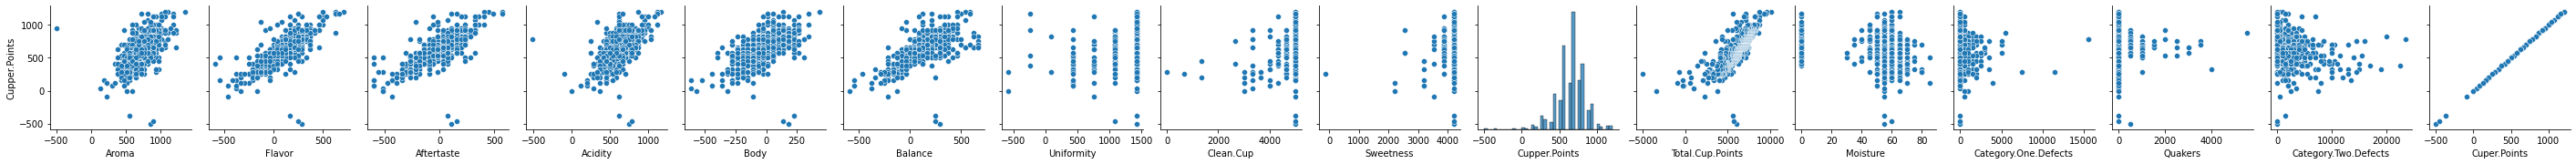

In [54]:
datanormal.head() 
sns.pairplot(datanormal, y_vars=['Cupper.Points'], x_vars=datanormal[:]) 

#Removing Outlier

In [122]:
def reject_outliers(data):
    u = np.mean(data['Cupper.Points'])
    s = np.std(data['Cupper.Points'])
    data_filtered = data[(data['Cupper.Points'] > u-2*s) & (data['Cupper.Points'] < u+2*s)]
    return data_filtered 
nooutlier=reject_outliers(datanormal) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


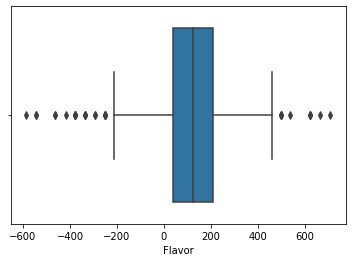

In [126]:
sns.boxplot(datanormal['Flavor'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


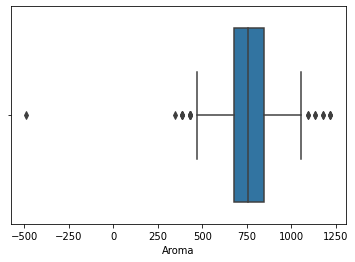

In [128]:
sns.boxplot(nooutlier['Aroma'])

# Lets make a linear regression model Using statsmodel.api

In [131]:
X0=nooutlier[['Aroma','Flavor','Body','Acidity','Balance','Aftertaste']] 
y=nooutlier['Cupper.Points'] 
X=sm.add_constant(X0)
Linearregression=sm.OLS(y,X).fit()

Linear Regression Result

In [132]:
Linearregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cupper.Points   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     405.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          4.67e-255
Time:                        14:20:55   Log-Likelihood:                -5405.2
No. Observations:                 934   AIC:                         1.082e+04
Df Residuals:                     927   BIC:                         1.086e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        507.3540     22.391     22.659      0.000     463.410     551.298
Aroma          0.0257      0.025      1.009      0.313      -0.024       0.076
Flavor         0.2741      0.036      7.688      0.000       0.204       0.344
Body           0.1575      0.029      5.407      0.000       0.100       0.215
Acidity        0.1023      0.026      3.917      0.000       0.051       0.154
Balance        0.2289      0.026      8.765      0.000       0.178       0.280
Aftertaste     0.2874      0.033      8.814      0.000       0.223       0.351
==============================================================================
Omnibus:                       89.029   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.716
Skew:                           0.339   Prob(JB):                     1.57e-82
Kurtosis:                       6.036   Cond. No.                     8.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Writing Equations

It seems we have a good Adjusted R Squared, indicating the model is performing good in predicting cup point

Cupper Points = 507.354+0.0257x Aroma + 0.2741 x Flavor + body *0.1575 +Acidity x 0.1023 + Balance x 0.2289 + 0.2874 x Aftertaste

visualization imposible lol

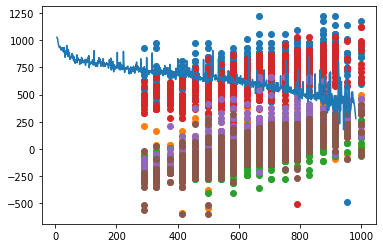

In [140]:
feat=['Aroma','Flavor','Body','Acidity','Balance','Aftertaste'] 

for x in feat : 
  plt.scatter(y,nooutlier[x])  
  0.2741, 0.1575, 0.1023, 0.2289, 0.2874
plt.plot(507.354+0.0257*nooutlier['Aroma']+0.2741*nooutlier['Flavor']+nooutlier['Body']*0.1575+nooutlier['Acidity']*0.1023+nooutlier['Balance']*0.2289+0.2874*nooutlier['Aftertaste'])

# Linear Regression with sklearn

In [170]:
regressor=LinearRegression()
X=nooutlier[(['Aroma','Flavor','Body','Acidity','Balance','Aftertaste'])] 
y=nooutlier['Cupper.Points']  
reg=regressor.fit(X,y) 
print('R Squared :', reg.score(X,y).round(2))
print('Coefficient :', reg.coef_)  

R Squared : 0.72
Coefficient : [0.02565013 0.27412577 0.15754855 0.10229577 0.22893775 0.28737431]


In [171]:
regressor.score(X,y) 
regressor.coef_  

array([0.02565013, 0.27412577, 0.15754855, 0.10229577, 0.22893775,
       0.28737431])

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  
pretor=regressor.fit(X_train, y_train) 
result=pretor.predict(X_test)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


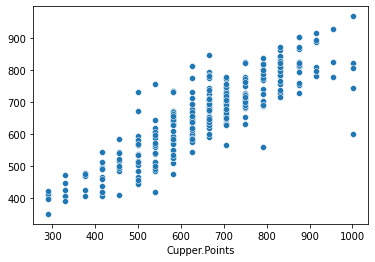

In [178]:
sns.scatterplot(y_test,result)

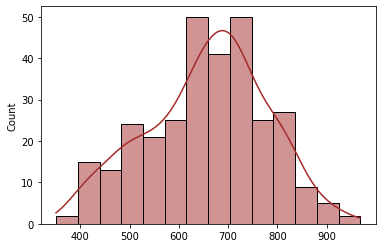

In [183]:
sns.histplot(result, kde=True, color='Brown')

In [186]:
from sklearn.metrics import mean_squared_error 
print('RMSE :', np.sqrt(mean_squared_error(y_test, result)))


RMSE : 73.65780879820962
